# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

- Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise?  
Let's denote $A_i$ as $i$-th column of matrix $A$. $A$, $X$, $B$ has sizes: $m \times n$, $n \times p$, $p \times q$ respectively. Then:  
<!-- $(AXB)_{ks} = \sum\limits_{i=1}^{n}\sum\limits_{j=1}^{p}a_{ki} x_{ij} b_{js} = \sum\limits_{i=1}^{n}a_{ki}\sum\limits_{j=1}^{p} x_{ij} b_{js}$ -->
$B = \begin{bmatrix} B_1 & B_2 & \ldots & B_q\end{bmatrix}$, $AXB = AX\begin{bmatrix} B_1 & B_2 & \ldots & B_q\end{bmatrix} = \begin{bmatrix} AXB_1 & AXB_2 & \ldots & AXB_q\end{bmatrix}$. That's mean that $(AXB)_i = AXB_i$.
Now we can write: $(AXB)_s = AXB_s = A \left(\sum\limits_{i=1}^{p} X_{i}b_{is}  \right) = \sum\limits_{i=1}^{p} b_{is}AX_{i} = \sum\limits_{i=1}^{p} (b_{is}A)X_{i} = \left\{ \text{the gaze method} \right\} = \begin{bmatrix} b_{1s}A & b_{2s}A & \ldots & b_{ps}A  \end{bmatrix} \text{Vec}(X) = (B_s^T \otimes A)\text{Vec}(X) \Rightarrow \mathrm{vec}(AXB) = \begin{bmatrix} B_1^T \otimes A \\ \vdots \\ B_q^T \otimes A\end{bmatrix}\text{Vec}(X) = (B^\top \otimes A)\, \mathrm{vec}(X)$  
Now it is easy to get a similar formula for rowwise $\mathrm{Vec}_\text{row}(X) = \mathrm{Vec}(X^T)$: $\mathrm{Vec}_\text{row}(AXB) = \mathrm{Vec}(B^TX^TA^T) = (A \otimes B^T)\mathrm{Vec}(X^T) =(A \otimes B^T)\mathrm{Vec}_\text{row}(X) $







- What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced  
Assume $A$ and $B$ has sizes $m \times n$ and $p \times q$ respectively. Then complexity of $a_{ij}B$ is $pq$. Then complexity of $A \otimes B$ is $nmpq$. Complexity of matvec multiplication for matrix with shape $mp \times nq$ is $mnpq$. Thus total complexity of naive computation is $2mnpq = O(mnpq)$. Now we can reduce it using formula from previous task: $\mathrm{vec}(AXB^\top) = (B \otimes A)\, \mathrm{vec}(X)$ where $X$ has shape $n \times q$ and $\text{Vec}(X) = x$. We know that naive matrix-matrix multiplication ($AX$ for example) has complexity $mnq$. Then complexity of $AXB^T$ is $mnq+nqp$.  



- Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.  
We'll use property of kronecker product from lecture: $(A \otimes B)(C \otimes D) = (AC) \otimes (BD)$.   
$(S_A \otimes S_B)(\Lambda_A \otimes I)(S_A^{-1} \otimes S^{-1}_B) = A \otimes I$  
$(S_A \otimes S_B)(I \otimes \Lambda_B)(S_A^{-1} \otimes S^{-1}_B) = I \otimes B \Rightarrow$
$A \otimes I + I \otimes B = (S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B)(S_A^{-1} \otimes S^{-1}_B)$. Also we know that $(S \otimes K)^{-1} = (S^{-1} \otimes K^{-1})$(since $(S \otimes K)(S^{-1} \otimes K^{-1}) = SS^{-1} \otimes KK^{-1} = I \otimes I = I$ where $I$ has different sizes). And we know that $A$ and $SAS^{-1}$ has the same eigenvalues. So $\lambda\left( (S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B)(S_A^{-1} \otimes S^{-1}_B) \right) = \lambda\left( (\Lambda_A \otimes I + I \otimes \Lambda_B) \right)$. Let's look at first diagonal block:
$$
\begin{bmatrix}
\lambda_{1} + \mu_1 & 0 & \ldots & 0 \\
0 & \lambda_{1} + \mu_2 & \ldots & 0 \\
\ldots & \ldots & \ldots & \ldots \\
0 & 0 & \ldots & \lambda_{1} + \mu_n 
\end{bmatrix}
$$
Second diagonal block:
$$
\begin{bmatrix}
\lambda_{2} + \mu_1 & 0 & \ldots & 0 \\
0 & \lambda_{2} + \mu_2 & \ldots & 0 \\
\ldots & \ldots & \ldots & \ldots \\
0 & 0 & \ldots & \lambda_{2} + \mu_n 
\end{bmatrix}
$$
$\ldots$ last diagonal block:
$$
\begin{bmatrix}
\lambda_{m} + \mu_1 & 0 & \ldots & 0 \\
0 & \lambda_{m} + \mu_2 & \ldots & 0 \\
\ldots & \ldots & \ldots & \ldots \\
0 & 0 & \ldots & \lambda_{m} + \mu_n 
\end{bmatrix}
$$
Other elements are zeros. So, we found that $\lambda(A\otimes I + I \otimes B) = \left\{ \lambda_i+\mu_j | i = \overline{1,m}\text{,} i = \overline{1,n} \right\}$ where $\lambda_i$ is eigval of $A$ and $\mu_j$ is eigval of $B$ $\left(\lambda_i \in \lambda(A) \text{, } \mu_j \in \lambda(B)\right)$.  We know that eigvec of $A$ is $S_Ae_i$ $\left(\text{since } A S_Ae_i = S_A\Lambda_A S_A^{-1} S_Ae_i = S_A\Lambda_A e_i = S_A\lambda_i e_i = \lambda_i S_A e_i \right)$, it's easy to understand that if $x_i = S_Ae_i$ is eigvec of $A$ and $y_j = S_Be^{'}_j$ (where $e_j^{'}$ just a vector of a different size than $e_i$, since it's related to matrix $B$, not $A$. Both vectors are vectors of appropriate standard basis)is eigvec of $B$ then $x \otimes y$ is eigvec of $A \otimes I + I \otimes B = (S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B)(S_A^{-1} \otimes S^{-1}_B)$:  
$(A\otimes I + I \otimes B)(x_i \otimes y_j) = (S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B)(S_A^{-1} \otimes S^{-1}_B)(S_Ae_i \otimes S_Be^{'}_j) = (S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B)(e_i \otimes e^{'}_j) = (S_A \otimes S_B)(\lambda_i e_i  \otimes e^{'}_j + e_i \otimes \mu_j e^{'}_j) = \lambda_i x_i \otimes y_j + x_i \otimes \mu_j y_j = (\lambda_i + \mu_j)x_i \otimes y_j$ So eigvecs of $(A\otimes I + I \otimes B)$ are all Kronecker products $x_i \otimes y_j$ where $x_i$ is eigvec of $A$ and $y_j$ is eigvec of $B$


- Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    From lectures we know formula $ \|e_k\|_2 \leq q^{k} \|e_0\|_2$ where 
    $$
       q = \frac{\lambda_{\max} - \lambda_{\min}}{\lambda_{\max} + \lambda_{\min}} = \frac{\mathrm{cond}(A) - 1}{\mathrm{cond}(A)+1},
    $$

    $$\mathrm{cond}(A) = \frac{\lambda_{\max}}{\lambda_{\min}} \quad \text{for} \quad A=A^*>0$$
    Now it's easy to calculate $k$ from equation $q^k = \varepsilon = 10^{-4} \Rightarrow k = \frac{\log{\varepsilon}}{\log{\left( \frac{\mathrm{cond}(A) - 1}{\mathrm{cond}(A)+1} \right)}}$
    - Chebyshev iteration (use $2$-norm) Also from lectures we know the same result about chebyshev iteration:
    $$
       \|e_{k+1}\|_2 \leq C q^k \|e_0\|_2, \quad q = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}, \quad C \leq 2
    $$
    Again, we can simply find following expression: $k = \frac{\log{\varepsilon / C}}{\log{\left( \frac{\sqrt{\mathrm{cond}(A)} - 1}{\sqrt{\mathrm{cond}(A)}+1} \right)}}$
    - Conjugate gradient method (use $A$-norm).  
    Again, from lecture we know that theoretically method converges in no more than $n$ iterations(it is obvious from the construction of the method). Another resoult from lecture is that for conjugate gradient method the same upper convergence bound holds as for chebyshev iteration:
    $$
       \|e_{k+1}\|_2 \leq \gamma q^k \|e_0\|_2, \quad q = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}, \quad \gamma \leq 2
    $$
    Now we can write: $k = min\left(n, \quad \frac{\log{\varepsilon / \gamma}}{\log{\left( \frac{\sqrt{\mathrm{cond}(A)} - 1}{\sqrt{\mathrm{cond}(A)}+1} \right)}}\right)$. Numerical results for our analytical estimations will be calculated in next block.

In [147]:
# Your solution is here
import numpy as np
import scipy
from scipy.sparse.linalg import LinearOperator
from scipy.sparse.linalg import cg
l_max = 1000
l_min = 1 / 1000
eps = 1e-4
C = 2
n = 1001
condA = l_max / l_min
k_Richardson = np.log(eps) / np.log((condA - 1) / (condA + 1))
k_Chebyshev = np.log(eps / C) / np.log((np.sqrt(condA) - 1) / (np.sqrt(condA) + 1))
k_conjugate_grad = min(n, k_Chebyshev)
print('analytical number of Richardson iterations =',  k_Richardson)
print('analytical number of Chebyshev iterations =',  k_Chebyshev)
print('analytical number of conjugate gradient iterations =',  k_conjugate_grad)

def richardson_diag(A, f, x0, eps, l_min, l_max, x_correct, maxiter = 1000000):
    tau = 2 / (l_min + l_max)
    x = x0
    error = [np.linalg.norm(x - x_correct) / np.linalg.norm(x_correct)]
    while error[-1] > eps and len(error) < maxiter:
        x = x - tau * (A * x - f)
        error.append(np.linalg.norm(x - x_correct) / np.linalg.norm(x_correct))
    return x, error
def leb_shuffle_2n(n):
    if n == 1:
        return np.array([0,], dtype=int)
    else:
        prev = leb_shuffle_2n(n // 2)
        ans = np.zeros(n, dtype=int)
        ans[::2] = prev
        ans[1::2] = n - 1 - prev
        return ans

def chebyshev_diag(A, f, x0, eps, l_min, l_max, x_correct, maxiter = 2**20):
    x = x0
    roots = [np.cos((np.pi * (2 * i + 1)) / (2 * maxiter)) for i in range(maxiter)]
    taus = [(l_max + l_min - (l_min - l_max) * r) / 2 for r in roots]
    good_perm_even = leb_shuffle_2n(maxiter)
    error = [np.linalg.norm(x - x_correct) / np.linalg.norm(x_correct)]
#     print('start cheb iterations')
    for i in range(maxiter):
        x = x - (A * x - f) / taus[good_perm_even[i]]
        error.append(np.linalg.norm(x - x_correct) / np.linalg.norm(x_correct))
        if error[-1] < eps:
            break
    return x, error

def conjugate_grad(A, f, x0, eps, l_min, l_max, x_correct, maxiter = 1000000):
    x = x0.copy()
    r = f - A * x
    p = r
    er = x_correct - x
    error = [np.sqrt(np.dot(A * (x_correct - x), x_correct - x) / np.dot(A * x_correct, x_correct))]
    for i in range(maxiter):
        Ap = A * p
        alpha = r @ r / (Ap @ p)
        x = x + alpha * p
        r_old = r.copy()
        r = r - alpha * Ap
        beta = r @ r / (r_old @ r_old)
        p = r + beta * p
        er = x_correct - x
        error.append(np.sqrt(np.dot(A * (x_correct - x), x_correct - x) / np.dot(A * x_correct, x_correct)))
        if error[-1] < eps:
            break
    return x, error

def A_matvec(x, A):
    return A * x

class iteretion_counter:
    def __init__(self, init_number = 0):
        self.s = init_number
        
    def count(self, x):
        self.s += 1
        return 0

A = (np.arange(1001)+ 1) / 1000
A[-1] = 1000
# print(A)
f = np.ones(1001)
x_correct = f / A

####################################
x_correct = np.random.random(1001)
f = A*x_correct
####################################

# A = np.diag(A)
x0 = np.zeros(1001)
maxiter = 2**23
x_rich, err_rich = richardson_diag(A, f, x0, eps, l_min, l_max, x_correct, maxiter = maxiter)
print('Chebyshev starts')
x_cheb, err_cheb = chebyshev_diag(A, f, x0, eps, l_min, l_max, x_correct, maxiter = maxiter)
print('cg starts')
x_conj, err_conj = conjugate_grad(A, f, x0, eps, l_min, l_max, x_correct, maxiter = maxiter)

# A_lo = LinearOperator((n, n), matvec = lambda x : A_matvec(x, A))
# a = iteretion_counter()
# x_cg, info = cg(A_lo,f,tol = eps, maxiter = 2**16, callback = a.count)

analytical number of Richardson iterations = 4605170.1860125
analytical number of Chebyshev iterations = 4951.742125686257
analytical number of conjugate gradient iterations = 1001
Chebyshev starts
cg starts


final relative accuracy for Richardson = 9.999980134897242e-05
number of iterations for Richardson = 3250598


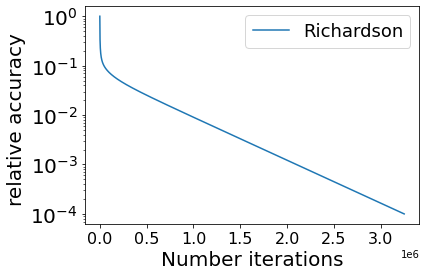

final relative accuracy for Chebyshev = 9.822094056061e-05
number of iterations for Chebyshev = 5619


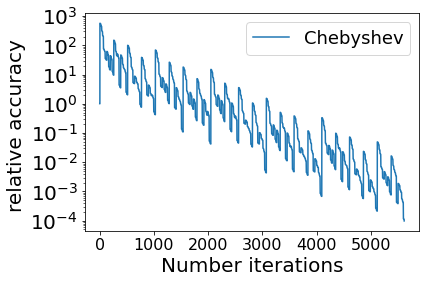

final relative accuracy for Conjugate gradient = 9.851839096570585e-05
number of iterations for Conjugate gradient = 91


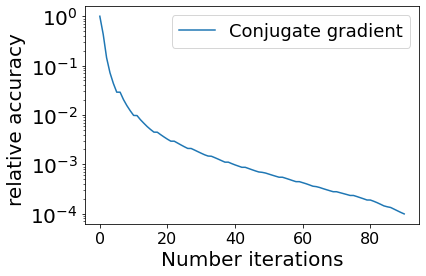

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(err_rich, label = 'Richardson')
plt.legend(fontsize=18)
plt.xlabel("Number iterations", fontsize=20)
plt.ylabel(r"relative accuracy ", fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
print('final relative accuracy for Richardson =', err_rich[-1])
print('number of iterations for Richardson =', len(err_rich))
plt.show()

plt.plot(err_cheb, label = 'Chebyshev')
plt.legend(fontsize=18)
plt.xlabel("Number iterations", fontsize=20)
plt.ylabel(r"relative accuracy ", fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
print('final relative accuracy for Chebyshev =', err_cheb[-1])
print('number of iterations for Chebyshev =', len(err_cheb))
plt.show()
# print('number of iterations for conjugate gradient =', a.s)
# print('relative accuracy =', np.linalg.norm(x_cg - x_correct) / np.linalg.norm(x_correct))

plt.plot(err_conj, label = 'Conjugate gradient')
plt.legend(fontsize=18)
plt.xlabel("Number iterations", fontsize=20)
plt.ylabel(r"relative accuracy ", fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
print('final relative accuracy for Conjugate gradient =', err_conj[-1])
print('number of iterations for Conjugate gradient =', len(err_conj))
plt.show()

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

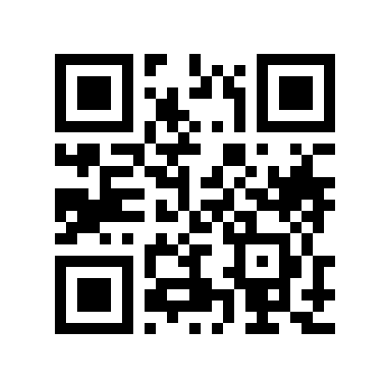

In [4]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")
plt.show()

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-i_2)^2 + (j_1-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [149]:
import numpy as np
import scipy
from scipy.sparse.linalg import LinearOperator
def T_matvec(x, alpha):
    n = int(x.shape[0]**(1/2))
    x_matrix = np.reshape(x,(n,n), order='c')
    T = np.array(range(n)).reshape((n,1))
    T1 = T.repeat(n,axis=1)
    T2 = T1.T
    T = alpha * np.exp(- alpha * (T1 ** 2 + T2 ** 2)) / np.pi
    T = np.concatenate((T,np.fliplr(T[:,1:])),axis=1)
    T = np.concatenate((T,np.flipud(T[1:,:])),axis=0)
    pseudo_x = np.zeros(T.shape)
    pseudo_x[:n,:n] = x_matrix
    pseudo_y = np.fft.ifft2(np.fft.fft2(T) * np.fft.fft2(pseudo_x))
#     return pseudo_y[:n,:n]
    return np.real(np.reshape(pseudo_y[:n,:n], (n ** 2,), order='c'))
alpha = 0.3
T_matr = np.array(([0,1,1,2],[1,0,2,1],[1,2,0,1],[2,1,1,0]))
l = alpha * np.exp(- alpha * (T_matr)) / np.pi
x = np.random.random(4)
n = int(x.shape[0]**(1/2))
print(l@x)
print(T_matvec(x, alpha))
print(np.linalg.norm(l@x - T_matvec(x, alpha)))
T = LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
# your code is here
print(np.linalg.norm(l@x - T.dot(x)))

[0.12628368 0.12594543 0.12884979 0.12889687]
[0.12628368 0.12594543 0.12884979 0.12889687]
4.8074067159589095e-17
4.8074067159589095e-17


**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**:
In fact, this is a convolution with the density of the normal distribution in the two-dimensional case. This kernel is positive definite (in continuous and discrete cases).  Its positive definiteness is proved using the Fourier transform (characteristic function). I won't have time to demonstrate because of lack of time. But in general, this is a well-known Gaussian kernel in machine learning, and its positive certainty is a well-known fact

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [19]:
# your code is here
class iteretion_counter:
    def __init__(self, init_number = 0):
        self.s = init_number
        
    def count(self, x):
        self.s += 1
        return 0

from scipy.sparse.linalg import cg
import pandas as pd
n = 3
alphas = [1e-1, 1e-2, 1e-3]
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
results = np.zeros((len(alphas), len(tols)))
num_iter = results.copy()

# x = np.random.random(n ** 2)

x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
x = x.reshape((n ** 2, ))

for i in range(len(alphas)):
    alpha = alphas[i]
    T = LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
    for j in range(len(tols)):
        tol = tols[j]
        y = T.dot(x)
        
        a = iteretion_counter()
#         x_cg, info = cg(T,y,tol = tol)
        x_cg, info = cg(T,y,tol = tol, maxiter = 1000, callback = a.count)
        results[i,j] = np.linalg.norm(x_cg - x) / np.linalg.norm(x)
        num_iter[i,j] = a.s
        print(a.s)

columns = tols
rows = alphas
df = pd.DataFrame(results, columns=columns, index=rows)
print(df)
df_iters = pd.DataFrame(num_iter, columns=columns, index=rows)
df_iters

11
46
136
788
1000
18
53
169
559
1000
13
49
158
489
1000
       1.000000e-03  1.000000e-04  1.000000e-05  1.000000e-06  1.000000e-07
0.100      0.128471      0.101914      0.095868      0.072183      0.070512
0.010      0.215192      0.201939      0.197165      0.194882      0.193342
0.001      0.436272      0.419854      0.400112      0.380940      0.372960


,1.000000e-03,1.000000e-04,1.000000e-05,1.000000e-06,1.000000e-07
0.100,11.0,46.0,136.0,788.0,1000.0
0.010,18.0,53.0,169.0,559.0,1000.0
0.001,13.0,49.0,158.0,489.0,1000.0


The problem is that due to numerical errors, the matrix is actually singular. Because of this, from a certain point on, convergence to the true solution is slowed down and the relative error ceases to change.   
The relative error converges to alpha-dependent values precisely because it is alpha that determines how many values in the matrix will turn to zeros

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [192]:
# your code is here
alpha = 0.01
tol = 1e-5
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
x = x.reshape((n ** 2, ))
T = LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
y_hat = T.dot(x) + np.random.normal(size = x.shape)
x_cg, info = cg(T,y_hat,tol = tol, maxiter = 300)

In [193]:
info

300

In [194]:
np.linalg.norm(x_cg - x) / np.linalg.norm(x)

111287.73961194257

In [124]:
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
x = x.reshape((n ** 2, ))
T = LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
z = T.dot(x)
y_hat = T.dot(x) + np.random.normal(size = x.shape)
np.linalg.norm(z - y_hat)/np.linalg.norm(z)


0.0048653365736848276

due to the fact that the matrix is not positively defined in practice, but only non-negatively, random noise outputs the righthand side from the Image(A). Therefore, the method can't converge. Regularization Will make matrix A positive definite

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [21]:
def T_lmbda_matvec(x, aplha, lmbda):
    n = int(x.shape[0]**(1/2))
    x_matrix = np.reshape(x,(n,n), order='c')
    T = np.array(range(n)).reshape((n,1))
    T1 = T.repeat(n,axis=1)
    T2 = T1.T
    T = alpha * np.exp(- alpha * (T1 ** 2 + T2 ** 2)) / np.pi
    T = np.concatenate((T,np.fliplr(T[:,1:])),axis=1)
    T = np.concatenate((T,np.flipud(T[1:,:])),axis=0)
    pseudo_x = np.zeros(T.shape)
    pseudo_x[:n,:n] = x_matrix
    pseudo_y = np.fft.ifft2(np.fft.fft2(T) * np.fft.fft2(pseudo_x))
    return np.real(np.reshape(pseudo_y[:n,:n], (n ** 2,), order='c')) + x * lmbda ** 2

# your code is here

from scipy.sparse.linalg import cg
import pandas as pd
n = 20
lambdas = [10, 1, 0.1]
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
alpha = 0.01
results = np.zeros((len(lambdas), len(tols)))
num_iter = results.copy()
x = np.random.random(n ** 2)

x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
x = x.reshape((n ** 2, ))

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    T_lam = LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha, lambda_))
    T = LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
    for j in range(len(tols)):
        tol = tols[j]
        np.random.seed(42)
        y = T.dot(x) + np.random.normal(size = x.shape)##############
        a = iteretion_counter()
        x_cg, info = cg(T_lam,y,tol = tol, maxiter = 1000, callback = a.count)
        results[i,j] = np.linalg.norm(x_cg - x) / np.linalg.norm(x)
        num_iter[i,j] = a.s
#         print(a.s)

columns = tols
rows = lambdas
df = pd.DataFrame(results, columns=columns, index=rows)
print(df)
df_iters = pd.DataFrame(num_iter, columns=columns, index=rows)
df_iters

      1.000000e-03  1.000000e-04  1.000000e-05  1.000000e-06  1.000000e-07
10.0      0.992306      0.992304      0.992304      0.992304      0.992304
1.0       0.614605      0.614585      0.614584      0.614584      0.614584
0.1       0.513029      0.516493      0.516688      0.516695      0.516695


,1.000000e-03,1.000000e-04,1.000000e-05,1.000000e-06,1.000000e-07
10.0,1.0,2.0,2.0,3.0,3.0
1.0,4.0,5.0,6.0,8.0,9.0
0.1,19.0,28.0,38.0,50.0,61.0


It can be seen that the convergence of the method has appeared. At the same time, there is still a convergence of the relative error. But the smaller the lambda, the smaller it is. This leads us to think that to find out x, we can reduce lambda. Thus, we will look for a balance between the speed of convergence and accuracy by selecting lambda.  
It is unlikely that we will exceed the accuracy for a noiseless matrix, but we have already significantly increased the convergence rate.

In [22]:
alpha = 0.01
tol = 1e-5
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
x = x.reshape((n ** 2, ))
lambda_ = 10
T = LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha, lambda_))
y_hat = T.dot(x) + np.random.normal(size = x.shape)
x_cg, info = cg(T,y_hat,tol = tol, maxiter = 300)

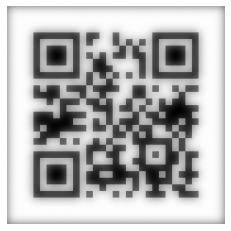

In [23]:
plt.imshow(x_cg.reshape((n,n)), cmap="gray")
plt.axis("off")
plt.show()

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [178]:
from scipy.linalg import circulant

def C_inv_matvec(x, aplha, lmbda):
    n = int(x.shape[0]**(1/2))
    x_matrix = np.reshape(x,(n,n), order='c')
    T = np.arange(n).reshape((n,1))
    T1 = T.repeat(n,axis=1)
    T2 = T1.T
    T = alpha * np.exp(- alpha * (T1 ** 2 + T2 ** 2)) / np.pi
    T = np.concatenate((T,np.fliplr(T[:,1:])),axis=1)
    T = np.concatenate((T,np.flipud(T[1:,:])),axis=0)
    T[0,0] += lmbda ** 2
    pseudo_x = np.zeros(T.shape)
    pseudo_x[:n,:n] = x_matrix
    pseudo_y = np.fft.ifft2(np.fft.fft2(pseudo_x) / np.fft.fft2(T))
    return np.real(np.reshape(pseudo_y[:n,:n], (n ** 2,), order='c'))

# def C_lmbda_matvec(x, aplha, lmbda):
#     n = int(x.shape[0]**(1/2))
# #     x_matrix = np.reshape(x,(n,n), order='c')
#     T = np.array(range(n)).reshape((n,1))
#     T1 = T.repeat(n,axis=1)
#     T2 = T1.T
#     T = alpha * np.exp(- alpha * (T1 ** 2 + T2 ** 2)) / np.pi
#     c = np.reshape(T, (n ** 2,), order='f')
#     c[0] += lmbda ** 2
#     y = np.fft.ifft(np.fft.fft(x) / np.fft.fft(c))
#     return y

#+ x * lmbda ** 2

# def C_inv_matvec1(x, aplha, lmbda):
#     n = int(x.shape[0]**(1/2))
#     x_matrix = np.reshape(x,(n,n), order='c')
#     T = np.arange(n).reshape((n,1))
#     T1 = T.repeat(n,axis=1)
#     T2 = T1.T
#     T = alpha * np.exp(- alpha * (T1 ** 2 + T2 ** 2)) / np.pi
# #     T = np.concatenate((T,np.fliplr(T[:,1:])),axis=1)
# #     T = np.concatenate((T,np.flipud(T[1:,:])),axis=0)
#     T[0,0] += lmbda ** 2
#     pseudo_x = np.zeros(T.shape)
#     pseudo_x[:n,:n] = x_matrix
#     pseudo_x = x_matrix
#     pseudo_y = np.fft.ifft2(np.fft.fft2(pseudo_x) / np.fft.fft(np.fft.fft(T).T).T) #np.fft.fft2(T)
#     return np.real(np.reshape(pseudo_y, (n ** 2,), order='c'))


# def T_vector(x, aplha, lmbda):
#     n = x.shape[0]
#     T = np.arange(n).reshape((n,))
#     T = alpha * np.exp(- alpha * (T ** 2)) / np.pi
#     T = np.concatenate((T,np.flipud(T[1:])),axis=0)
#     T[0] += lmbda ** 2
#     pseudo_x = np.zeros(T.shape)
#     pseudo_x[:n] = x.copy()
#     y = np.fft.ifft(np.fft.fft(T)*np.fft.fft(pseudo_x))
#     return y[:n]

# def C_inv_vector(x, aplha, lmbda):
#     n = x.shape[0]
#     T = np.arange(n).reshape((n,))
#     T = alpha * np.exp(- alpha * (T ** 2)) / np.pi
#     T[0] += lmbda ** 2
#     pseudo_x = x.copy()
#     y = np.fft.ifft(np.fft.fft(pseudo_x) / np.fft.fft(T))
#     return y

    
        

# your code is here

alpha = 0.01
tol = 1e-5
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
x = x.reshape((n ** 2, ))

lambda_ = 1

precondition = LinearOperator((n**2, n**2), matvec = lambda x : C_inv_matvec(x, alpha, lambda_))
T = LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha, lambda_))

T_lam = LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha, lambda_))
T = LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
np.random.seed(42)

y_hat = T.dot(x) + np.random.normal(size = x.shape)
x_cg, info = cg(T_lam,y_hat,tol = tol, maxiter = 1000)
%timeit x_cg, info = cg(T_lam,y_hat,tol = tol, maxiter = 1000)
print(info)
%timeit x_cg, info = cg(T_lam,y_hat,tol = tol, maxiter = 1000, M = precondition)
print(info)
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
tols = [1e-5]
for i in range(len(tols)):
    tol = tols[i]
    a = iteretion_counter()
    x_cg, info = cg(T_lam,y_hat,tol = tol, maxiter = 200, callback = a.count)
    res = np.linalg.norm(x_cg - x) / np.linalg.norm(x)
    print(f"tol = {tol}, iterations = {a.s}, relative error = {res}")

    a = iteretion_counter()
    x_cg, info = cg(T_lam,y_hat,tol = tol, maxiter = 200,  M = precondition, callback = a.count)
    res = np.linalg.norm(x_cg - x) / np.linalg.norm(x)
    print(f"tol = {tol}, iterations = {a.s}, relative error = {res} with precondition")

1.18 s ± 54.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0
1.12 s ± 3.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0
tol = 1e-05, iterations = 6, relative error = 0.6145840967452887
tol = 1e-05, iterations = 3, relative error = 0.6145841321813044 with precondition


As the numpy documentation promises, the convergence rate can increase significantly if you choose the right precondition

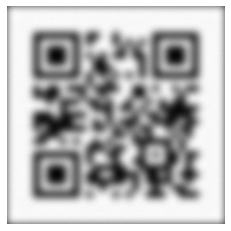

In [176]:
plt.imshow(x_cg.reshape((n,n)), cmap="gray")
plt.axis("off")
plt.show()

In [173]:
# A = np.array([[1,2],[3,4]])
# B = np.array([[5,6],[7,8]])
# X = np.array([[9,10],[11,12]])
# left = np.reshape((A@X@B), (-1,), order='c')
# print((A@X@B))
# print('left =',left)
# right = np.kron(A,B.T)@np.reshape(X, (-1,), order = 'c')
# print('right =', right)

# x = np.array([10,100])
# print(x.T@A@x)
# np.dot(A@x,x)